# Satelite Altimeter Data for OTI

for details: [Radwave read the docs]( https://radwave.readthedocs.io/en/latest/)

In [1]:

import math 
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sys
import RADWave as rwave

C:\Users\lachl\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lachl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\lachl\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Loading RADWave library and initialisation
We first start by importing RADwave library into our working space.

In [9]:
pip install Cartopy

Note: you may need to restart the kernel to use updated packages.


In [19]:
#OTI extent - data is close to OTI as possible, focussed on east (exposed) side
bboxextent = [152.1,152.7,-23.65,-23.25]

wa = rwave.waveAnalysis(altimeterURL=r'C:\Users\lachl\Desktop\RADwave/IMOS_URLs_OTI.txt', bbox=bboxextent, 
                  stime=[2023,1,1], etime=[2023,2,24])

Processing Alitmeter Data

In [20]:
wa.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               1   
   +  name SARAL       / number of tracks                               1   
   +  name SENTINEL-3A / number of tracks                               1   
   +  name SENTINEL-3B / number of tracks                               1   
   +  name CRYOSAT-2   / number of tracks                               1   
   +  name ENVISAT     / number of tracks                               1   
   +  name GEOSAT      / number of tracks                               1   
   +  name ERS-2       / number of tracks                               1   
   +  name GFO         / number of tracks                               1   
   +  name TOPEX       / number of tracks                               1   
No altimeter data found...


In [21]:
wa.readAltimeterData(saveCSV = 'altimeterData.csv')

Reading Processed Altimeter Dataset 



Visualise

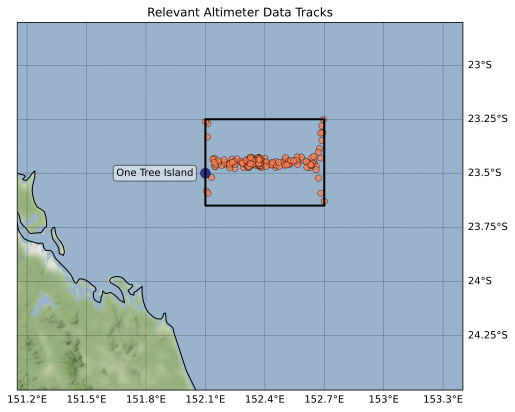

Figure saved:  altimeterdata


In [22]:
mapextent = [153.4, 151.15, -24.5, -22.8]

wa.visualiseData(title="Relevant Altimeter Data Tracks", extent=mapextent, 
                 addcity=['One Tree Island', 152.1, -23.5], markersize=40, zoom=8,
                 fsize=(8, 7), fsave='altimeterdata')

In [23]:
time_var = wa.variables["date"]

AttributeError: 'waveAnalysis' object has no attribute 'variables'

## Computing wave regime for specified location

To perform wave analysis and compute the wave parameters discussed in the documentation, we run the generateTimeSeries function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both instantaneous and monthly wave variables:

significant wave height (m) - wh & wh_rolling
wave period (s) - period & period_rolling
wave energy flux (kW/m) - power & power_rolling
wave average energy density (J/m2) - energy & energy_rolling
wave group velocity (m/s) - speed & speed_rolling

In [ ]:
timeseries = wa.generateTimeSeries()

In [ ]:
wa.timeseries.dtypes

In [ ]:
def trim_time_interval(dataframe, start, finish):
    
    trim_dataframe = dataframe[(dataframe.date >= start) & (dataframe.date <= finish)]
    
    return trim_dataframe.copy()
#start = pd.datetime(1950,1,1)
#finish = pd.datetime(1989,1,1)
#df1 = trim_time_interval(wa.timeseries, start, finish)


#start = pd.datetime(1995,1,1)
#finish = pd.datetime(2022,1,1)
#df2 = trim_time_interval(wa.timeseries, start, finish)

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df1.date, df1.wh, c = 'lightgrey',  label = 'H$_s$')
ax.plot(df2.date, df2.wh, c = 'lightgrey')
ax.plot(df1.date, df1.wh_rolling, c = 'b', label = '30-Day Average H$_s$')
ax.plot(df2.date, df2.wh_rolling, c = 'b')
ax.set_ylabel('H$_s$ (m)')
ax.set_xlabel('Date')
plt.title('RADWave Satellite Altimeter Derived Wave Heights for 1985 - 2018')
ax.grid()
ax.legend(loc = 'upper right')
plt.savefig('RADWAVE_HS')

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df1.date, df1.period, c = 'lightgrey', label = 'Wave Period T$_z$')
ax.plot(df2.date, df2.period, c = 'lightgrey')
ax.plot(df1.date, df1.period_rolling, c = 'g', label = '30-Day Average T$_z$')
ax.plot(df2.date, df2.period_rolling, c = 'g')
plt.title('RADWave Satellite Altimeter Derived Wave Periods for 1985 - 2018')
ax.set_ylabel('T$_p$ (s)')
ax.set_xlabel('Date')
ax.grid()
ax.legend(loc = 'upper right')
plt.savefig('RADWAVE_Tz')


In [ ]:
# Significant wave height
wa.plotTimeSeries(time=[0,2022],series='H', fsize=(12, 5), fsave='seriesH'), 
#wa.plotTimeSeries(time=[0,2016],series='H', fsize=(12, 5), fsave='seriesH')

# Plotting time series

In [ ]:


# Wave period
wa.plotTimeSeries(time=[1995,2016],series='T', fsize=(10, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[1995,2016],series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[1995,2016],series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[1995,2016], series='Cg', fsize=(10, 5), fsave=None)


In [ ]:
#calculate period from power and H

g = 9.81
rho = 1020

Hm = 1.356
Tm = 5.696

P = ((rho*g**2)/64) * Hm**2 * Tm


    
print (P)   
